## Follow the lifeCycle of Machine learning 
- Unterstanding the problem statemet
- Data colleection
- Perform data cleaning
- Explotary data analysis
- data preprocessing
- model training
- best model selection

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

In [2]:
#import libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2.1 data collection

In [3]:
# import data in csv using pandas
df = pd.read_csv('../data/data.csv')
# show top 5 recod
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# data check


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#checking the number of unique value of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
#check stats of data
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## insights
- there are 3 numbrical columns 
- the std of these 3 columns approx 14.60-15.15
- the mean also between 66 to 68.
- the minimum value of math score is 0 and the reading score >=17 and writing_score >=19

## Exploring the data


In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
print(f"{df['gender'].nunique()} Unique value in gender ->{df['gender'].unique()}")
print(f"{df['race_ethnicity'].nunique()} unique value in race ethnicity ->{df['race_ethnicity'].unique()}")
print(f"{df['parental_level_of_education'].nunique()} Unique value in parental_level_of_education ->{df['parental_level_of_education'].unique()}")
print(f"{df['lunch'].nunique()} Unique value in lunch ->{df['lunch'].unique()}")
print(f"{df['test_preparation_course'].nunique()} Unique value in test_preparation_course ->{df['test_preparation_course'].unique()}")



2 Unique value in gender ->['female' 'male']
5 unique value in race ethnicity ->['group B' 'group C' 'group A' 'group D' 'group E']
6 Unique value in parental_level_of_education ->["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
2 Unique value in lunch ->['standard' 'free/reduced']
2 Unique value in test_preparation_course ->['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
# Adding the total and average column
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Exploring data or EDA
### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

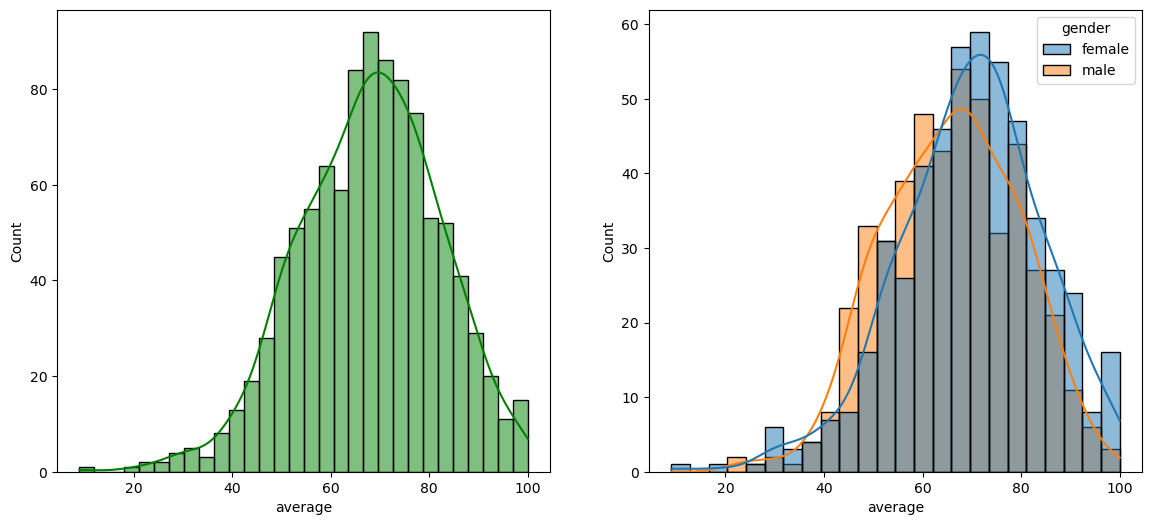

In [15]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

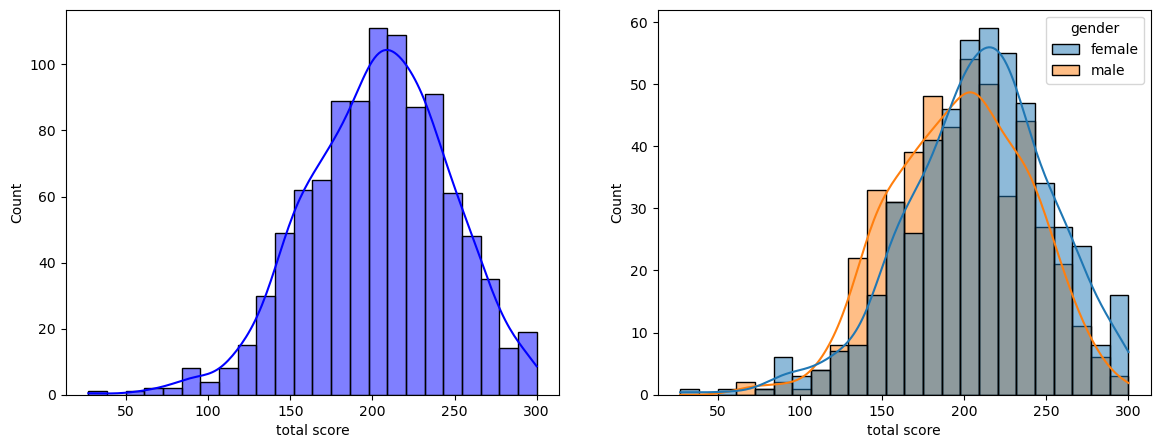

In [17]:
fig, ax =plt.subplots(1,2,figsize=(14,5))
plt.subplot(121)
sns.histplot(data=df, x='total score',kde=True, color='b')
plt.subplot(122)
sns.histplot(data=df, x='total score',kde=True,hue='gender')
plt.show()

#### Insight
- female studends do perform well then male students

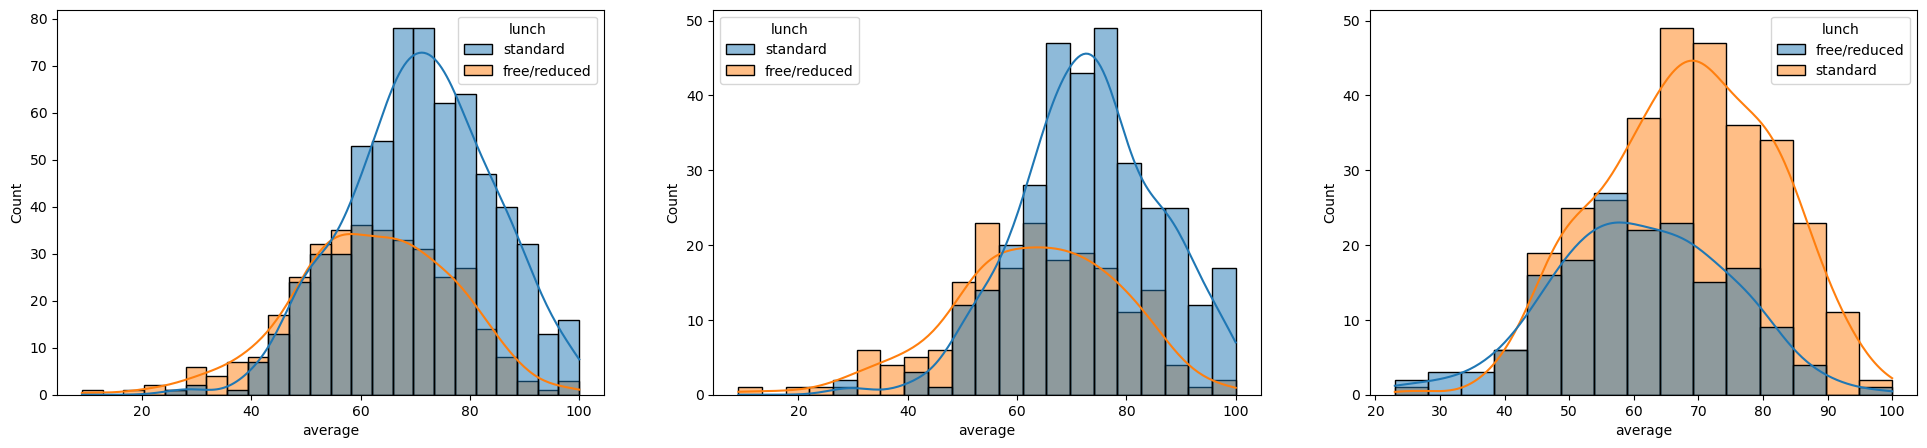

In [25]:
fig, ax =plt.subplots(1,3,figsize=(24,5))
plt.subplot(131)
sns.histplot(data=df ,x='average',kde=True, hue='lunch')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()


##### Insights
- Standard lunch helps performe well in exam for both male and female student.